In [1]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [2]:

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from vecstack import stacking
from scipy import stats
import os


<h2>Acquire data</h2>

In [3]:
print(color.BOLD+color.PURPLE+'Preview of the sample data :')
#Reading train and test data 

df1=pd.read_csv('Risk Dataset.csv')
df1.head()

Preview of the sample data :


,Unnamed: 0,ID,FicoScore,CustomScore1,CustomScore2,CreditCardBalance,InquriesInLast6Months,IncomeAnnual,BadFlag
0,1,0123ca88-b4ae-4dfa-a647-3d59955af8b2,646,0.318988,0.290841,14701,1,100000,0
1,2,8a5cd764-f2a8-4f2d-b936-e22f46c74cba,646,0.229145,0.230242,16300,1,115000,0
2,3,a4706386-9fe4-49e0-a92b-7901d752670c,741,0.059483,0.037298,13827,0,83000,0
3,4,31ead444-e33e-437a-b481-6c5fafbdb755,772,0.068970,0.063600,15612,2,108000,0
4,5,afe8dc16-8865-4156-9d4c-f2825e2645c5,724,0.077304,0.085119,37588,1,82000,0


In [4]:
print(color.BOLD+color.PURPLE+'Dataset has',df1.shape[0],'rows and',df1.shape[1],'columns.')

Dataset has 95633 rows and 9 columns.


<h2> Data Inspection </h2>

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95633 entries, 0 to 95632
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             95633 non-null  int64  
 1   ID                     95633 non-null  object 
 2   FicoScore              95633 non-null  int64  
 3   CustomScore1           95633 non-null  float64
 4   CustomScore2           95633 non-null  float64
 5   CreditCardBalance      95633 non-null  int64  
 6   InquriesInLast6Months  95633 non-null  int64  
 7   IncomeAnnual           95633 non-null  int64  
 8   BadFlag                95633 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 6.6+ MB


In [6]:
cat=[]
num=[]
for column in df1.columns:
    if df1[column].dtype == 'object':
        cat.append(column)
    else:
        num.append(column)

print(color.BOLD+color.PURPLE+'Categorical features in DataSet',cat)
print("\n")
print(color.BOLD+color.PURPLE+'Numberical features in DataSet',num)

Categorical features in DataSet ['ID']


Numberical features in DataSet ['Unnamed: 0', 'FicoScore', 'CustomScore1', 'CustomScore2', 'CreditCardBalance', 'InquriesInLast6Months', 'IncomeAnnual', 'BadFlag']


In [7]:
#Reading unique values in non-numeric columns
print(color.BOLD+color.PURPLE+"Unique values in categorical features of dataset :\n")
for column in df1:
    print(color.BOLD+color.DARKCYAN,df1[column].value_counts().sort_values())
    print('\n')

Unique values in categorical features of dataset :

 2047     1
12282    1
14329    1
16376    1
18423    1
        ..
47127    1
49176    1
90156    1
12294    1
2049     1
Name: Unnamed: 0, Length: 95633, dtype: int64


 41ed81c7-30ca-4d9c-85d6-178b9d5cb737    1
d3eecffd-418b-4ba2-83c9-d038a4501ea1    1
7a3a3873-4037-4b92-9336-669a35f5c303    1
41d9d3d3-fc26-4ffa-beac-a0f922692b7c    1
259a2766-7dda-4221-8794-e1f2ebf409d2    1
                                       ..
6eacff93-d182-4fe6-97e0-b03a2a791a2e    1
7d0ca682-5ef3-4be6-a64b-1abca8dc834d    1
7ee14e62-1ae1-4596-92dd-ae2acd533300    1
623ba364-50a9-44bf-9075-5c1c3c724d99    1
dde61b26-8ec9-4c98-b899-43e67d94e1d8    1
Name: ID, Length: 95633, dtype: int64


 843       1
845       1
846       1
840       2
842       2
       ... 
690    1069
687    1077
670    1104
680    1106
683    1140
Name: FicoScore, Length: 228, dtype: int64


 0.273313    1
0.167240    1
0.069198    1
0.227509    1
0.327065    1
           ..
0.202754    

In [8]:
def null_table(data):
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame


In [9]:
print(color.BOLD+color.PURPLE+"Missing values in dataset :\n")


Missing values in dataset :



In [10]:
null_frame_train = null_table(df1)
null_frame_train=null_frame_train[null_frame_train['Approximate Percentage of Null Values'] >0]
null_frame_train.sort_values(by='Approximate Percentage of Null Values',ascending=False)


,Columns,Count of Null Values,Approximate Percentage of Null Values


In [11]:
print(color.BOLD+color.PURPLE+"Duplicate check on dataset :\n")
duplicateRowsDF = df1[df1.duplicated()]
duplicateRowsDF.sum().sum()

Duplicate check on dataset :



0.0

# Exploratory Data Analysis

<h2> Data Distribution </h2>

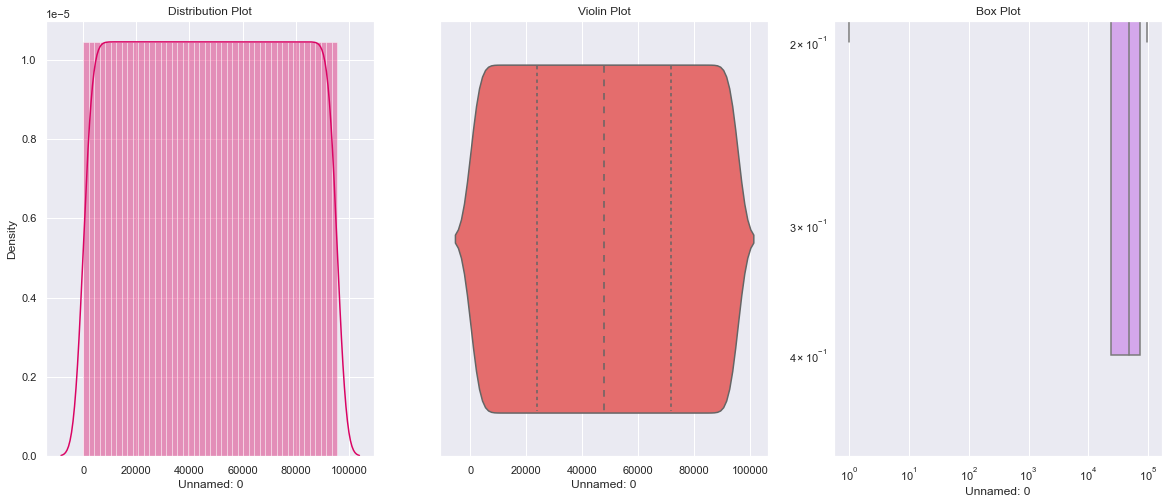

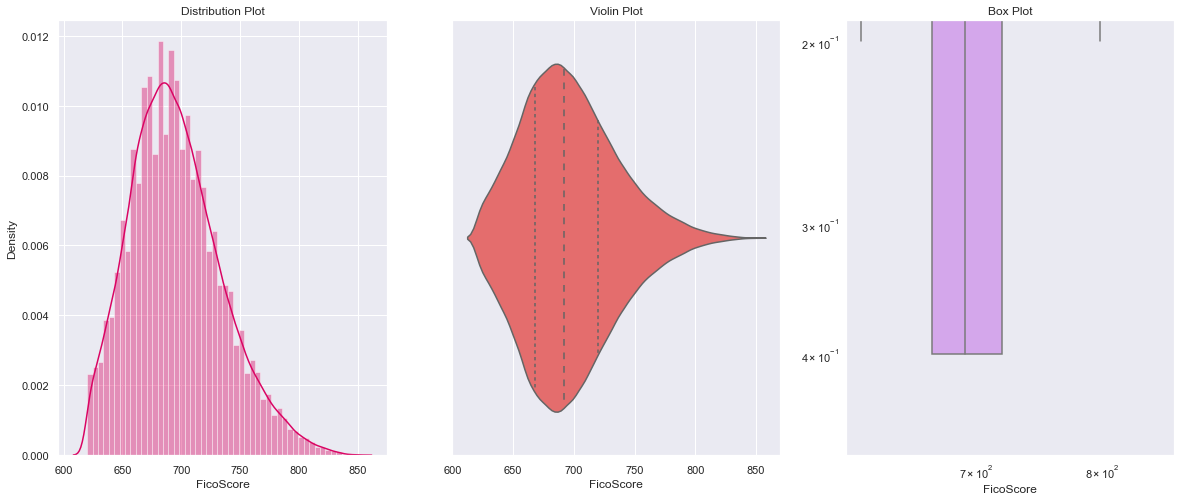

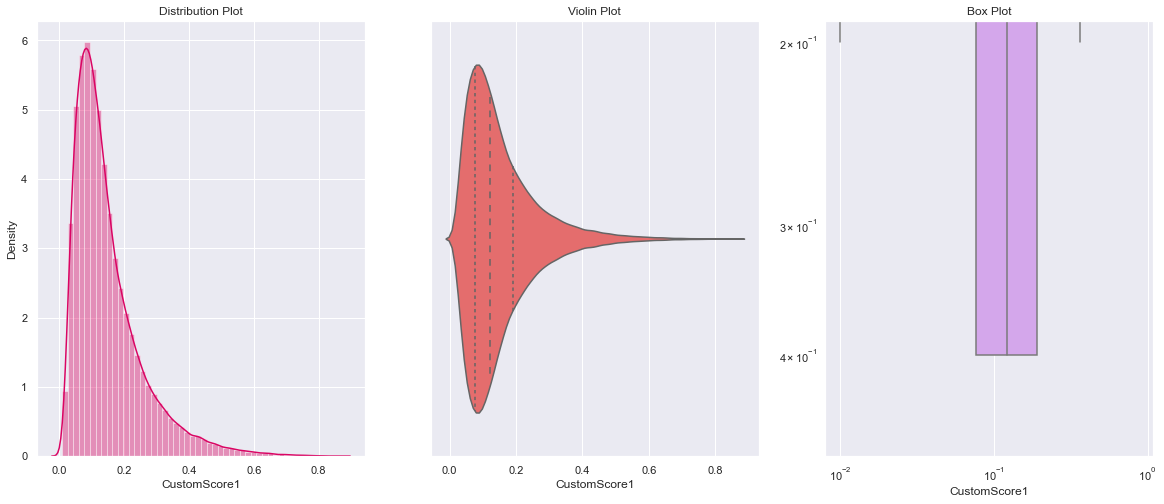

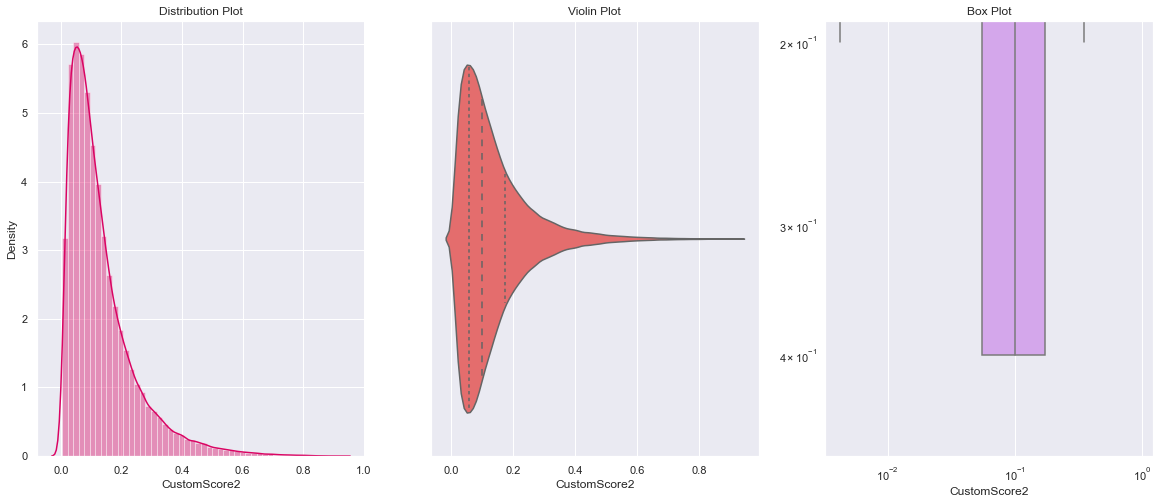

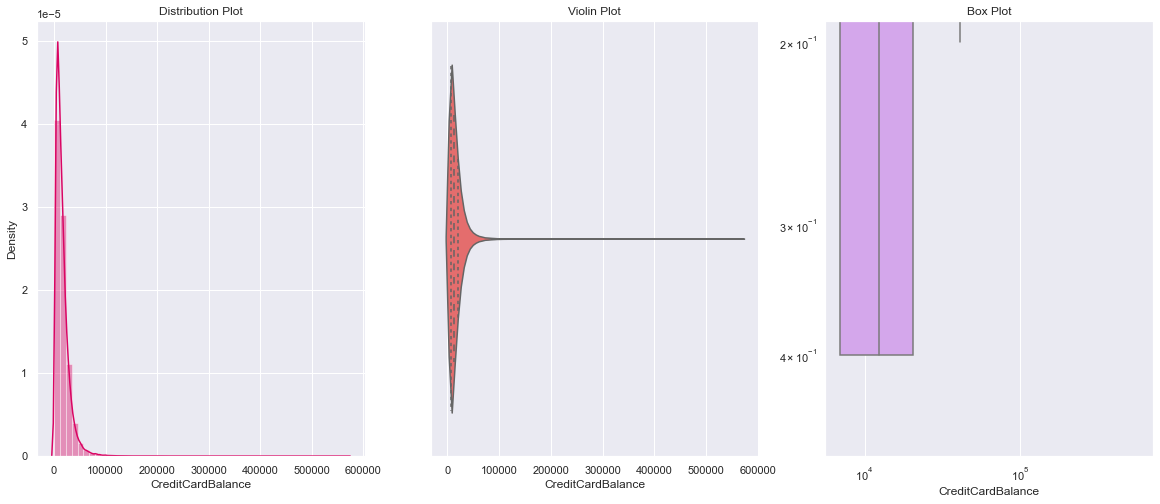

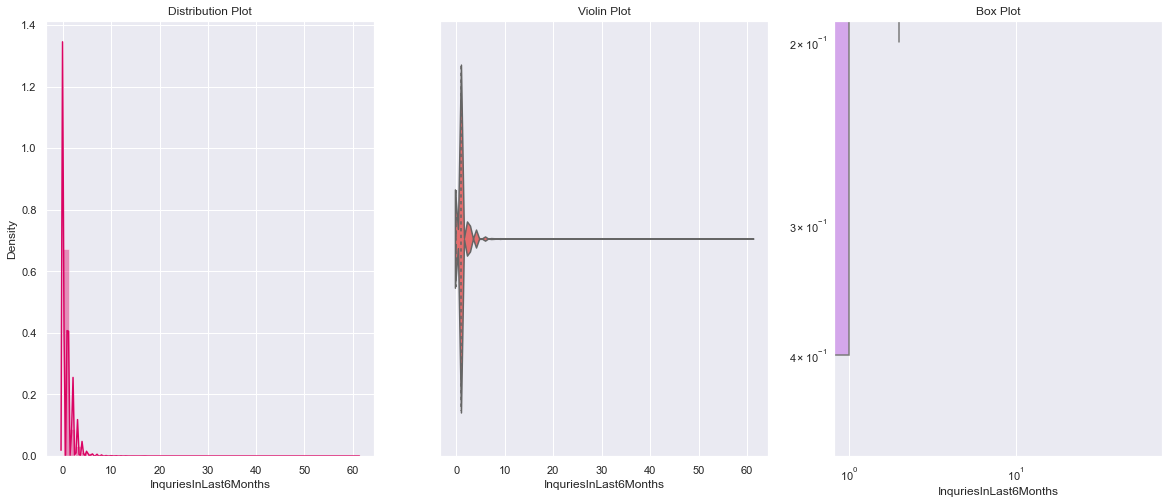

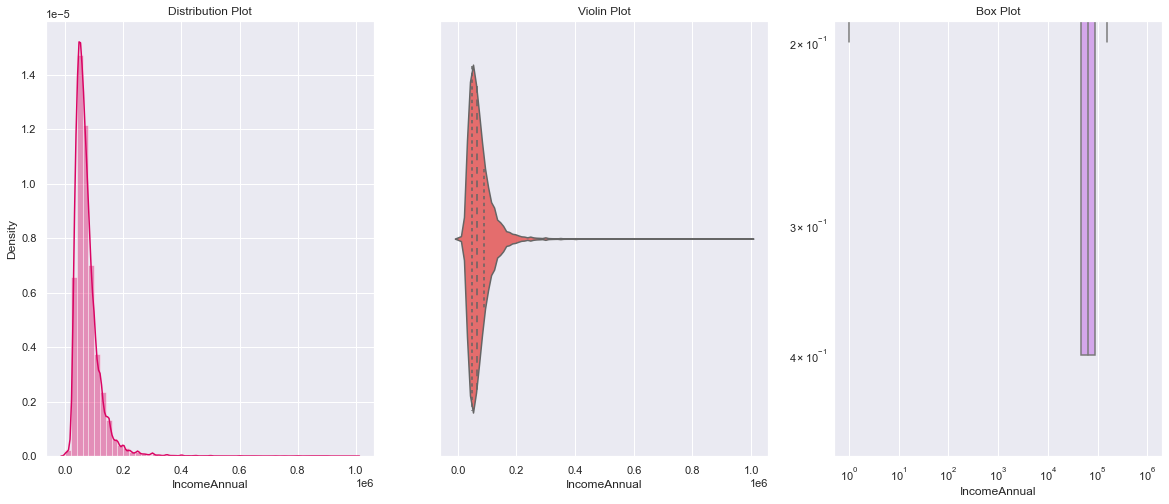

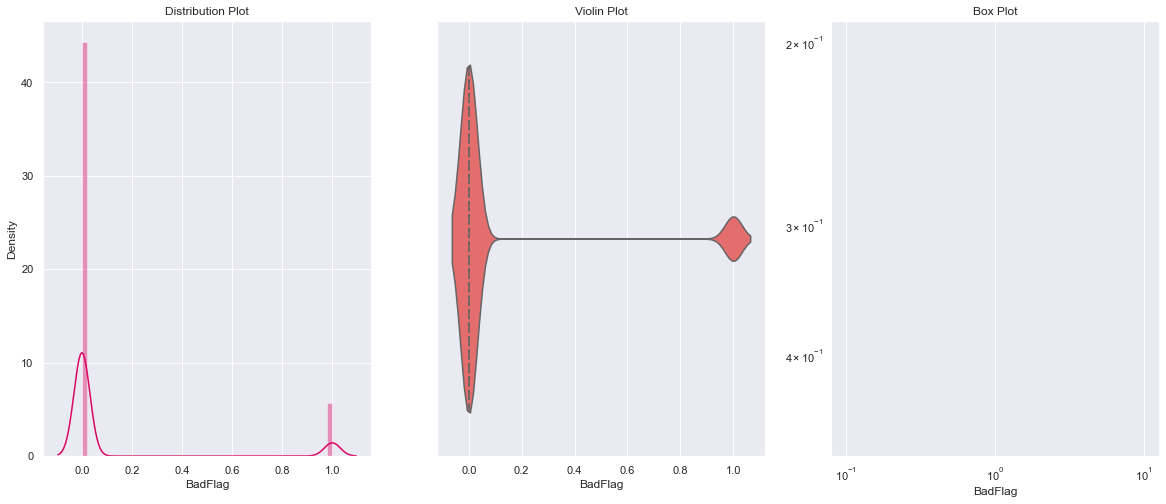

In [12]:
def uni(df,col,v,hue =None):

    sns.set(style="darkgrid")
    
    if v == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df1[col],ax=ax[0], color="#da0463")
        plt.yscale('log')
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df1, x=col,ax=ax[1], inner="quartile", color="#f85959")
        plt.yscale('log')
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df1, x=col,ax=ax[2],orient='v', color="#d89cf6")
        plt.xscale('log')
        plt.yscale('log')
plt.show()

for column in df1.columns:
    if df1[column].dtype != 'object':
        
        uni(df1,column,0)

<h1> Outlier Treatment </h1>

In [13]:
print(color.BOLD+color.PURPLE+'Ouliers in dataset:')

Ouliers in dataset:


In [14]:
list_of_numerics=df1.select_dtypes(include=['float','int32']).columns
types= df1.dtypes
overview= df1.apply(lambda x: [round(x.min()), 
                                 round(x.max()), 
                                 round(x.mean()), 
                                 round(x.quantile(0.5))] if x.name in list_of_numerics else x.unique())

outliers= df1.apply(lambda x: sum(
                                 (x<(x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))))|
                                 (x>(x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))))
                                 if x.name in list_of_numerics else ''))


explo = pd.DataFrame({'Types': types,
                      'Outliers': outliers})
explo


,Types,Outliers
Unnamed: 0,int64,0
ID,object,0
FicoScore,int64,0
CustomScore1,float64,4884
CustomScore2,float64,5182
CreditCardBalance,int64,0
InquriesInLast6Months,int64,0
IncomeAnnual,int64,0
BadFlag,int64,0


In [15]:
def cap_data(df):
    for col in df.columns:
        
        
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int32')):
    
            Q1=df[col].quantile(0.25)
            Q3=df[col].quantile(0.75)
            IQR=Q3-Q1
            lr = Q1-1.5*IQR
            ur = Q3+1.5*IQR
            df[col]=np.where(df[col]>ur,ur,df[col])
            df[col]=np.where(df[col]<lr,lr,df[col])

        else:
            df[col]=df[col]
    return df

final_df=cap_data(df1)
print(color.BOLD+color.PURPLE+'Function implemented to treat outliers.')


Function implemented to treat outliers.


In [16]:
print(color.BOLD+color.PURPLE+'There are no outliers in dataset now:')


There are no outliers in dataset now:


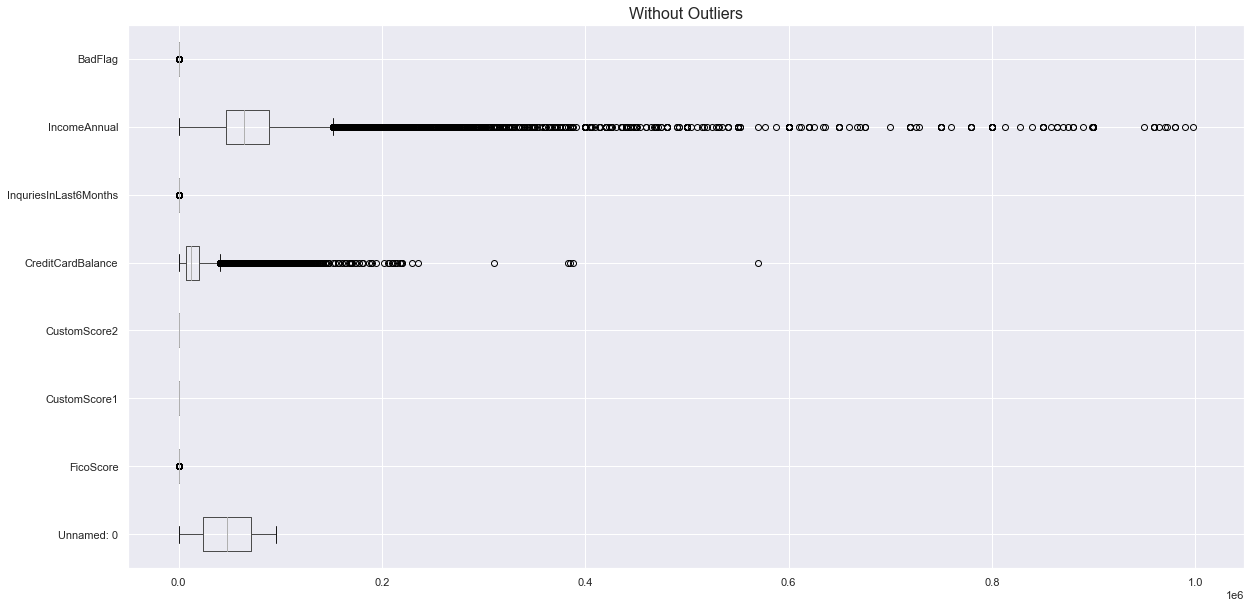

In [17]:
# construct box plot for continuous variables
cont=df1.dtypes[(df1.dtypes!='uint8') & (df1.dtypes!='bool')].index
plt.figure(figsize=(20,10))
df1[cont].boxplot(vert=False)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [18]:
list_of_numerics=df1.select_dtypes(include=['float','int32']).columns
types= df1.dtypes
overview= df1.apply(lambda x: [round(x.min()), 
                                 round(x.max()), 
                                 round(x.mean()), 
                                 round(x.quantile(0.5))] if x.name in list_of_numerics else x.unique())

outliers= df1.apply(lambda x: sum(
                                 (x<(x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))))|
                                 (x>(x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))))
                                 if x.name in list_of_numerics else ''))


explo = pd.DataFrame({'Types': types,
                      'Outliers': outliers})
explo


,Types,Outliers
Unnamed: 0,int64,0
ID,object,0
FicoScore,int64,0
CustomScore1,float64,0
CustomScore2,float64,0
CreditCardBalance,int64,0
InquriesInLast6Months,int64,0
IncomeAnnual,int64,0
BadFlag,int64,0


<h1> Checking correlations in data </h1>

In [19]:
correlation = df1.corr()

cmap = sns.light_palette("cyan", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,Unnamed: 0,FicoScore,CustomScore1,CustomScore2,CreditCardBalance,InquriesInLast6Months,IncomeAnnual,BadFlag
Unnamed: 0,1.000000,-0.002516,0.008070,0.007052,-0.004147,0.004410,-0.001862,-0.000095
FicoScore,-0.002516,1.000000,-0.603490,-0.598537,0.054729,-0.164508,0.088861,-0.177754
CustomScore1,0.008070,-0.603490,1.000000,0.915681,-0.125305,0.514902,-0.124819,0.309672
CustomScore2,0.007052,-0.598537,0.915681,1.000000,-0.028977,0.483671,-0.097685,0.315062
CreditCardBalance,-0.004147,0.054729,-0.125305,-0.028977,1.000000,-0.060575,0.410463,-0.040388
InquriesInLast6Months,0.004410,-0.164508,0.514902,0.483671,-0.060575,1.000000,0.019875,0.191202
IncomeAnnual,-0.001862,0.088861,-0.124819,-0.097685,0.410463,0.019875,1.000000,-0.034566
BadFlag,-0.000095,-0.177754,0.309672,0.315062,-0.040388,0.191202,-0.034566,1.000000


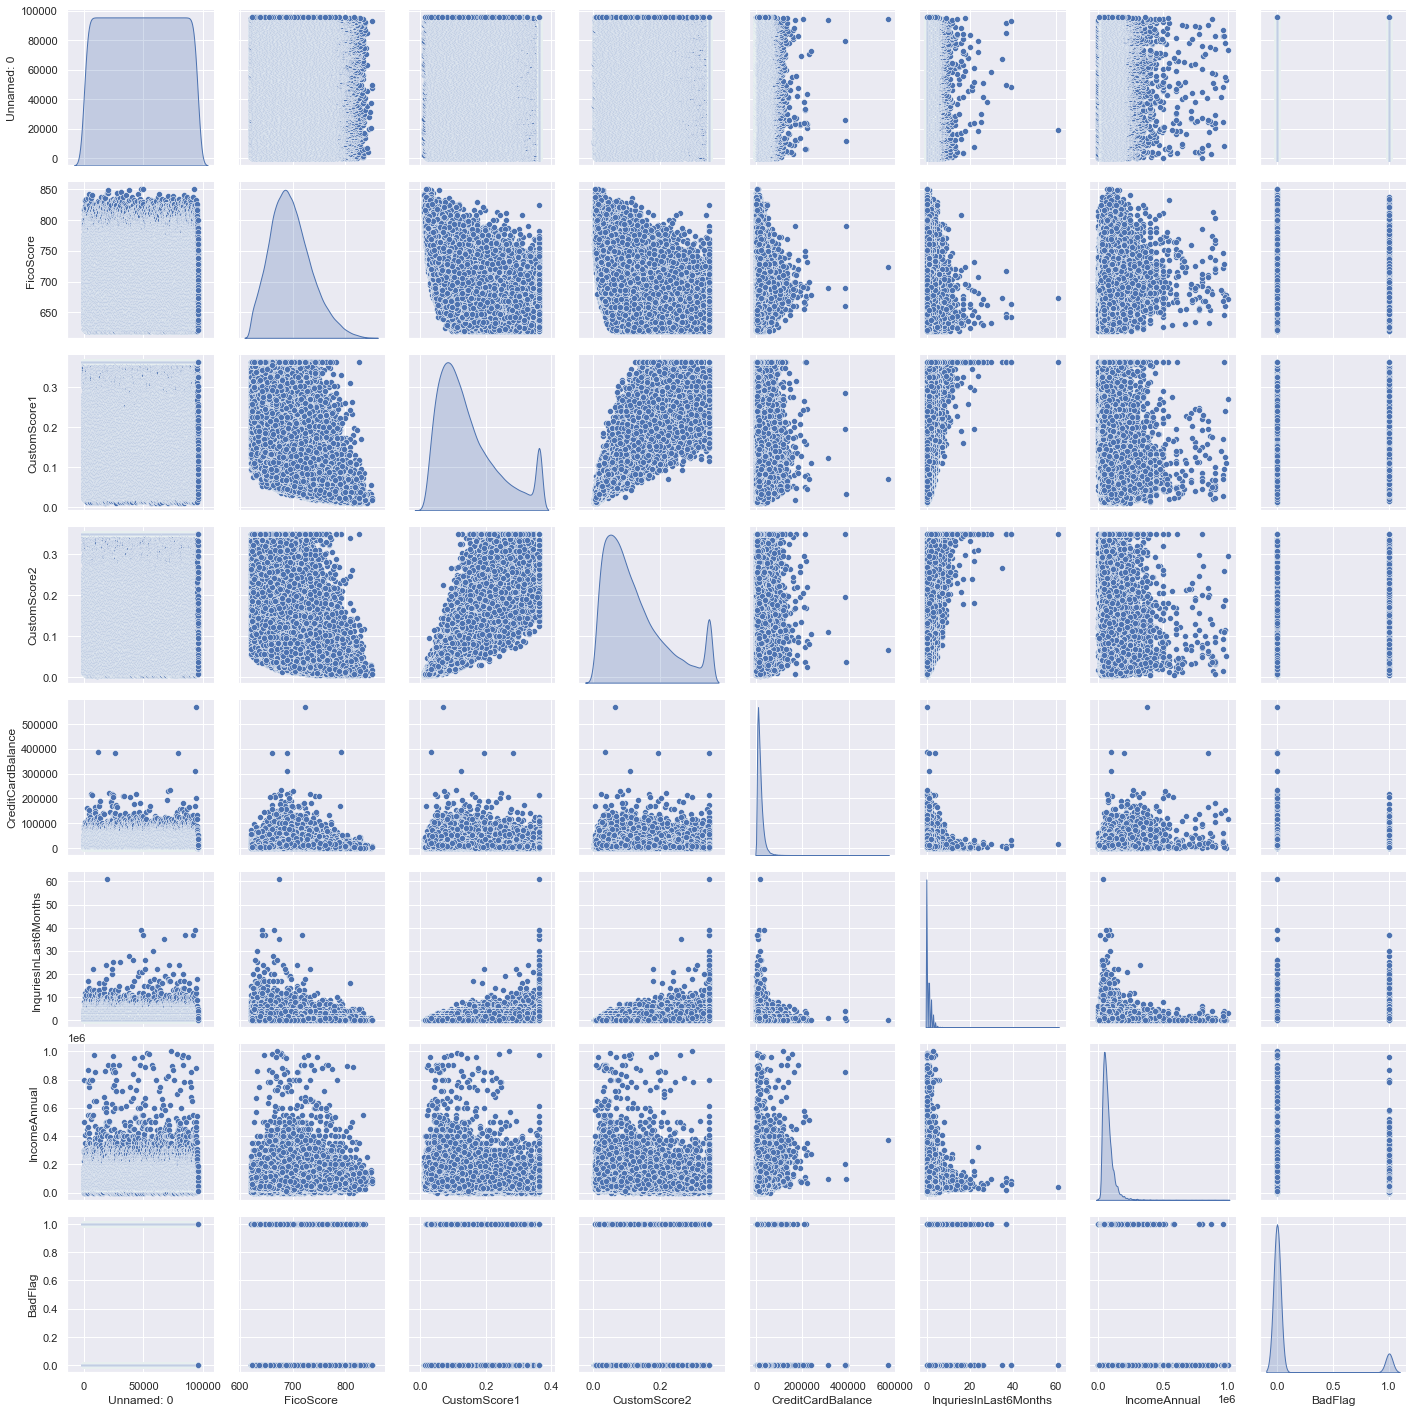

In [20]:
sns.pairplot(df1,diag_kind="kde")
plt.show()

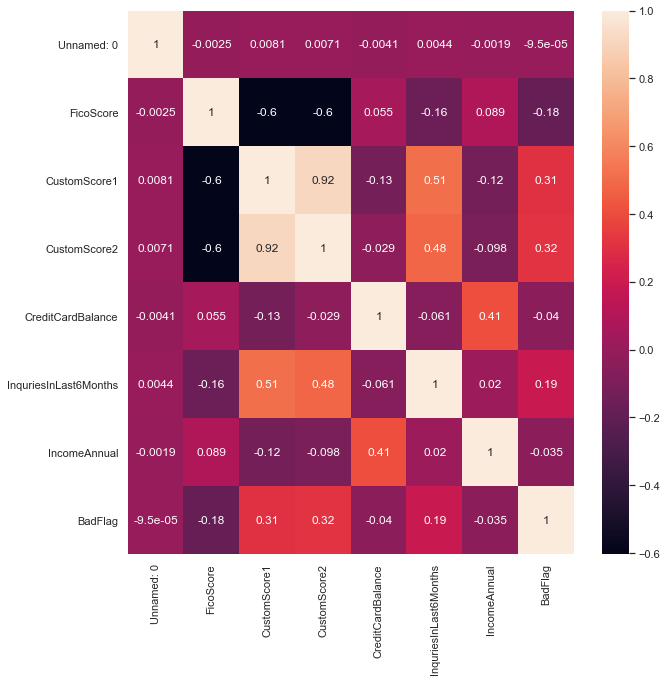

In [21]:
plt.figure(figsize = (10, 10))
sns.heatmap(df1.corr(), annot = True)
plt.show()


In [22]:
print(color.BOLD+color.PURPLE+'Data has no issue of multicolinearity.')


Data has no issue of multicolinearity.


In [23]:
df1.drop(columns=['Unnamed: 0','ID'],axis=1,inplace=True)


In [24]:
df1.head()

,FicoScore,CustomScore1,CustomScore2,CreditCardBalance,InquriesInLast6Months,IncomeAnnual,BadFlag
0,646,0.318988,0.290841,14701,1,100000,0
1,646,0.229145,0.230242,16300,1,115000,0
2,741,0.059483,0.037298,13827,0,83000,0
3,772,0.068970,0.063600,15612,2,108000,0
4,724,0.077304,0.085119,37588,1,82000,0


In [25]:
# Copy all the predictor variables into X dataframe
X = df1.drop('BadFlag', axis=1)

# Copy target into the y dataframe. 
y = df1['BadFlag']

<h1> Executing models for feature importance </h1>

In [26]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances


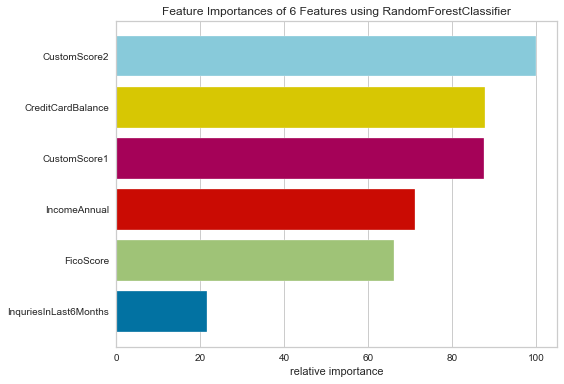

<AxesSubplot:title={'center':'Feature Importances of 6 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [27]:
from sklearn.ensemble import RandomForestClassifier


# Load the classification data set

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [28]:
RF_feature_scores = pd.Series(viz.feature_importances_, index=X.columns).sort_values(ascending=False)
df2 = pd.DataFrame()


In [29]:
df2=pd.DataFrame(RF_feature_scores)
df2

,0
IncomeAnnual,100.000000
InquriesInLast6Months,87.741158
CreditCardBalance,87.443941
CustomScore2,71.055368
CustomScore1,66.053419
FicoScore,21.720757


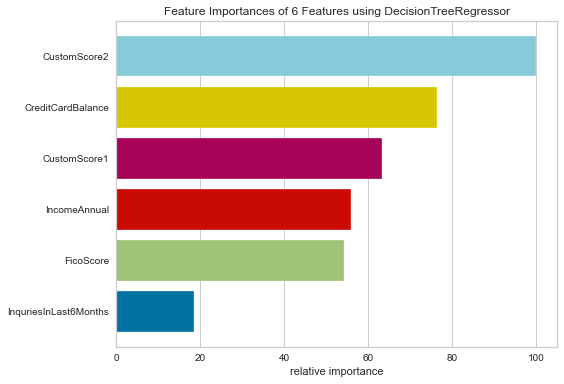

<AxesSubplot:title={'center':'Feature Importances of 6 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [30]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
viz1 = FeatureImportances(model1)
viz1.fit(X, y)
viz1.show()

In [31]:
RF_feature_scores1 = pd.Series(viz1.feature_importances_, index=X.columns).sort_values(ascending=False)

df2['CART']=pd.DataFrame(RF_feature_scores)

[20:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


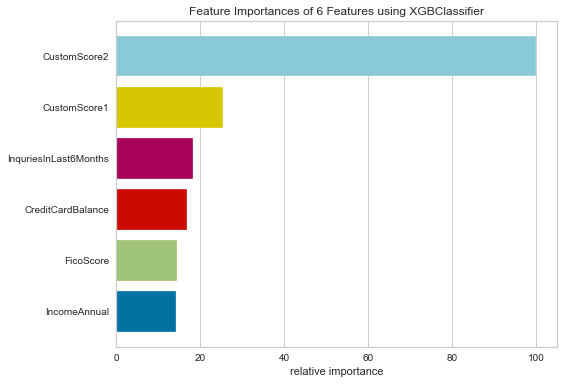

<AxesSubplot:title={'center':'Feature Importances of 6 Features using XGBClassifier'}, xlabel='relative importance'>

In [32]:
from xgboost import XGBClassifier
model2 = XGBClassifier()
viz2 = FeatureImportances(model2)
viz2.fit(X, y)
viz2.show()

In [33]:
RF_feature_scores2 = pd.Series(viz2.feature_importances_, index=X.columns).sort_values(ascending=False)

df2['XGB']=pd.DataFrame(RF_feature_scores2)


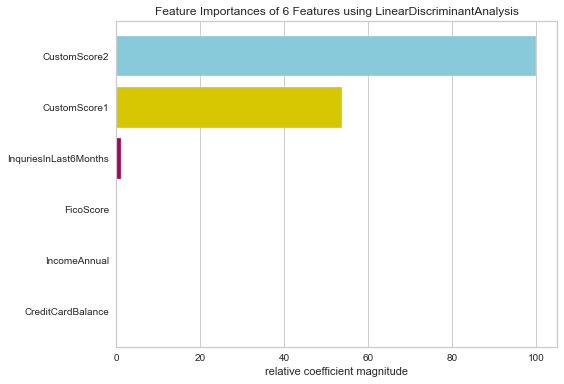

<AxesSubplot:title={'center':'Feature Importances of 6 Features using LinearDiscriminantAnalysis'}, xlabel='relative coefficient magnitude'>

In [34]:
model3= LinearDiscriminantAnalysis()
viz3 = FeatureImportances(model3)
viz3.fit(X, y)
viz3.show()

In [35]:
RF_feature_scores3 = pd.Series(viz3.feature_importances_, index=X.columns).sort_values(ascending=False)

df2['LDA']=pd.DataFrame(RF_feature_scores3)

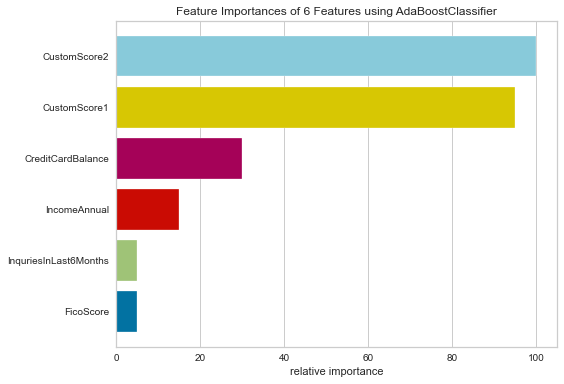

<AxesSubplot:title={'center':'Feature Importances of 6 Features using AdaBoostClassifier'}, xlabel='relative importance'>

In [36]:
model4= AdaBoostClassifier()
viz4 = FeatureImportances(model4)
viz4.fit(X, y)
viz4.show()

In [37]:
RF_feature_scores4 = pd.Series(viz4.feature_importances_, index=X.columns).sort_values(ascending=False)

df2['AdaBoost']=pd.DataFrame(RF_feature_scores4)

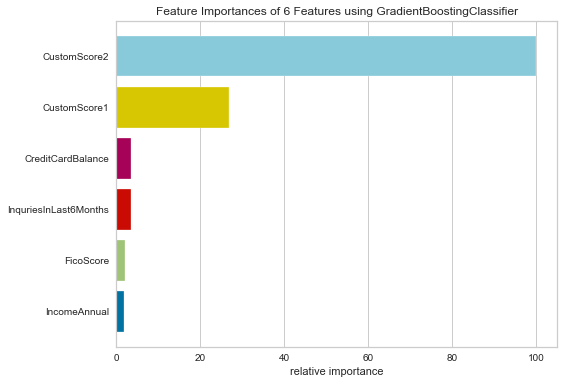

<AxesSubplot:title={'center':'Feature Importances of 6 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [38]:
model5= GradientBoostingClassifier()
viz5 = FeatureImportances(model5)
viz5.fit(X, y)
viz5.show()

In [39]:
RF_feature_scores5 = pd.Series(viz5.feature_importances_, index=X.columns).sort_values(ascending=False)

df2['GradientBoost']=pd.DataFrame(RF_feature_scores5)

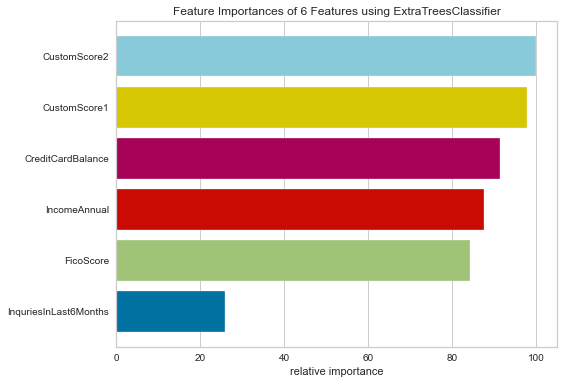

<AxesSubplot:title={'center':'Feature Importances of 6 Features using ExtraTreesClassifier'}, xlabel='relative importance'>

In [40]:
model6= ExtraTreesClassifier()
viz6 = FeatureImportances(model6)
viz6.fit(X, y)
viz6.show()

In [41]:
RF_feature_scores6 = pd.Series(viz6.feature_importances_, index=X.columns).sort_values(ascending=False)

df2['ExtraTree']=pd.DataFrame(RF_feature_scores6)

In [42]:
df2

,0,CART,XGB,LDA,AdaBoost,GradientBoost,ExtraTree
IncomeAnnual,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000
InquriesInLast6Months,87.741158,87.741158,25.364662,53.669400,95.0,26.842503,97.844169
CreditCardBalance,87.443941,87.443941,18.365820,1.174934,30.0,3.619861,91.328769
CustomScore2,71.055368,71.055368,16.793812,0.023336,15.0,3.473485,87.455321
CustomScore1,66.053419,66.053419,14.559433,0.000006,5.0,2.051807,84.320322
FicoScore,21.720757,21.720757,14.279363,-0.000069,5.0,1.882720,25.998393


<h2> Result: From all the models , its clear that feature importance of IncomeAnnual is the most important feature, followed by  InquriesInLast6Months,CustomScore2,CustomScore1 and  Fico score is the least important feature.<br></h2>

<h2> Amongst CustomScore2,CustomScore1 and FicoScore, CustomScore2 has highest important as per above. 
Classification algorithms are used to validate important feature that best classified BadFlag as 0 & 1 </h2>

In [43]:
df1.drop('FicoScore',axis=1,inplace=True)
df1.head()

,CustomScore1,CustomScore2,CreditCardBalance,InquriesInLast6Months,IncomeAnnual,BadFlag
0,0.318988,0.290841,14701,1,100000,0
1,0.229145,0.230242,16300,1,115000,0
2,0.059483,0.037298,13827,0,83000,0
3,0.068970,0.063600,15612,2,108000,0
4,0.077304,0.085119,37588,1,82000,0


In [47]:
df12=pd.DataFrame(df1)
df3=pd.DataFrame(df1)

In [48]:
df12.drop('CustomScore1',axis=1,inplace=True)

In [49]:
df3.drop('CustomScore2',axis=1,inplace=True)

In [53]:
# Copy all the predictor variables into X dataframe
X = df1.drop('BadFlag', axis=1)

# Copy target into the y dataframe. 
y = df1['BadFlag']

In [54]:
print(color.BOLD+color.PURPLE+"Splitting Target(X) and Predictor(y) into training and test set in 70:30 ratio :")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

Splitting Target(X) and Predictor(y) into training and test set in 70:30 ratio :


In [55]:
print(color.BOLD+color.PURPLE+'Data is split as independent and dependent variables into training and test set in 70:30 ratio:')
print("\n")
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the independent variables:',X_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the independent variables:',X_test.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Data is split as independent and dependent variables into training and test set in 70:30 ratio:


Number of rows and columns of the training set for the independent variables: (66943, 5)
Number of rows and columns of the training set for the dependent variable: (66943,)
Number of rows and columns of the test set for the independent variables: (28690, 5)
Number of rows and columns of the test set for the dependent variable: (28690,)


<h3> Scaling dataset :Normalizing all the numeric feature in the range of 0 to 1</h3>

In [56]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [57]:
print(color.BOLD+color.PURPLE+'Scaled Train Data Set:')
X_train_norm[0]

Scaled Train Data Set:


array([0.69480411, 0.52750967, 0.01840424, 0.02564103, 0.03673371])

In [58]:
print(color.BOLD+color.PURPLE+'Scaled Test Data Set:')
X_test_norm[0]

Scaled Test Data Set:


array([0.02403182, 0.01887883, 0.02670701, 0.        , 0.15306036])

<h3> Model Building implmeneted through Stacking</h3>
<br> 1. Building Level 0 models :Building different baseline models with 10-fold cross validation.
<br> 2. Model selection : Selecting list of top performing models to be used in stacked ensemble method.
<br> 3. Model Evaluation.
<br> 4. Comparing individiual and stacked model performance.

<h4> Build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0 of stacked ensemble method:<h4>

In [59]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [60]:
print(color.BOLD+color.CYAN+'Accuracy')
models = GetBasedModel()
names,results = BasedLine2(X_train_norm, y_train,models)

Accuracy
LR_L2: 0.887920 (0.003575)
LDA: 0.879494 (0.004699)
KNN7: 0.880092 (0.003234)
KNN5: 0.876163 (0.003619)
KNN11: 0.884036 (0.002766)
CART: 0.815261 (0.004297)
NB: 0.846974 (0.004061)
AB: 0.887561 (0.003603)
GBM: 0.887845 (0.003335)
RF_Ent100: 0.884917 (0.003272)
RF_Gini100: 0.884200 (0.004010)
ET100: 0.882363 (0.003568)
MLP: 0.887979 (0.003603)
SGD3000: 0.887815 (0.003747)


In [61]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(11),
    KNeighborsClassifier(7),
    ExtraTreesClassifier(n_estimators= 500),
    GaussianNB(),
    MLPClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(penalty='l2'),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

In [62]:
S_train, S_test = stacking(models,                   
                           X_train_norm, y_train, X_test_norm,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [14]

model  0:     [RandomForestClassifier]
    fold  0:  [0.88468145]
    fold  1:  [0.88251550]
    fold  2:  [0.88430801]
    fold  3:  [0.88459815]
    fold  4:  [0.88459815]
    ----
    MEAN:     [0.88414025] + [0.00082222]
    FULL:     [0.88414024]

model  1:     [RandomForestClassifier]
    fold  0:  [0.88505490]
    fold  1:  [0.88266487]
    fold  2:  [0.88378520]
    fold  3:  [0.88549447]
    fold  4:  [0.88467284]
    ----
    MEAN:     [0.88433446] + [0.00100681]
    FULL:     [0.88433443]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.88333707]
    fold  1:  [0.88378520]
    fold  2:  [0.88445739]
    fold  3:  [0.88512100]
    fold  4:  [0.88624141]
    ----
    MEAN:     [0.88458841] + [0.00102413]
    FULL:     [0.88458838]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.87960266]
    fold  1:  [0.87870640]
    fold  2:  [0.880947

In [63]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred_rm_f1 = model.predict(S_test)
print(color.BOLD+color.PURPLE+'Final Test Accuracy score: [%.8f]' % accuracy_score(y_test, y_pred_rm_f1))

Final Test Accuracy score: [0.88459394]


In [65]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred_train = model.predict(S_train)
print(color.BOLD+color.PURPLE+'Final Train Accuracy score: [%.8f]' % accuracy_score(y_train, y_pred_train))

Final Train Accuracy score: [0.88920425]


<h4> Model Evaluation</h4>

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.884594,0.452381,0.011505,0.998188,0.022439,0.504846,3.985986,0.057258


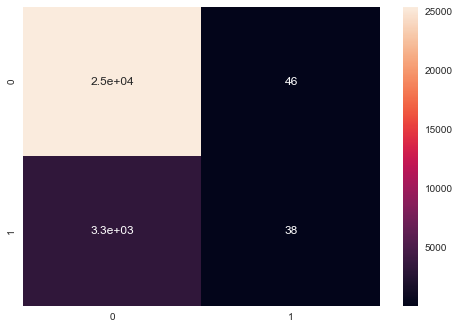

In [66]:
CM=confusion_matrix(y_test,y_pred_rm_f1)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rm_f1)
acc= accuracy_score(y_test, y_pred_rm_f1)
roc=roc_auc_score(y_test, y_pred_rm_f1)
prec = precision_score(y_test, y_pred_rm_f1)
rec = recall_score(y_test, y_pred_rm_f1)
f1 = f1_score(y_test, y_pred_rm_f1)

mathew = matthews_corrcoef(y_test, y_pred_rm_f1)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.889204,0.590643,0.040346,0.996467,0.075533,0.518406,3.826752,0.133227


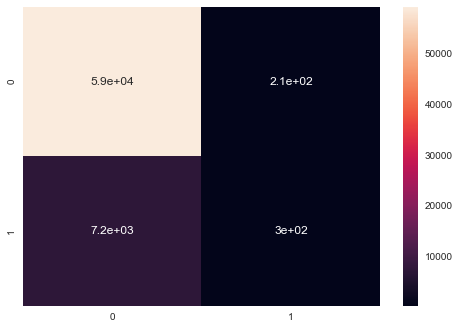

In [67]:
CM=confusion_matrix(y_train,y_pred_train)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_train, y_pred_train)
acc= accuracy_score(y_train, y_pred_train)
roc=roc_auc_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

mathew = matthews_corrcoef(y_train, y_pred_train)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

Removing Customer Score 2

In [68]:
df12.head()

,CustomScore2,CreditCardBalance,InquriesInLast6Months,IncomeAnnual,BadFlag
0,0.290841,14701,1,100000,0
1,0.230242,16300,1,115000,0
2,0.037298,13827,0,83000,0
3,0.063600,15612,2,108000,0
4,0.085119,37588,1,82000,0


In [69]:
# Copy all the predictor variables into X dataframe
X = df12.drop('BadFlag', axis=1)

# Copy target into the y dataframe. 
y = df12['BadFlag']

In [70]:
print(color.BOLD+color.PURPLE+"Splitting Target(X) and Predictor(y) into training and test set in 70:30 ratio :")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

Splitting Target(X) and Predictor(y) into training and test set in 70:30 ratio :


In [71]:
print(color.BOLD+color.PURPLE+'Data is split as independent and dependent variables into training and test set in 70:30 ratio:')
print("\n")
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the independent variables:',X_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the independent variables:',X_test.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Data is split as independent and dependent variables into training and test set in 70:30 ratio:


Number of rows and columns of the training set for the independent variables: (66943, 4)
Number of rows and columns of the training set for the dependent variable: (66943,)
Number of rows and columns of the test set for the independent variables: (28690, 4)
Number of rows and columns of the test set for the dependent variable: (28690,)


<h3> Scaling dataset :Normalizing all the numeric feature in the range of 0 to 1</h3>

In [72]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [73]:
print(color.BOLD+color.PURPLE+'Scaled Train Data Set:')
X_train_norm[0]

Scaled Train Data Set:


array([0.52750967, 0.01840424, 0.02564103, 0.03673371])

In [74]:
print(color.BOLD+color.PURPLE+'Scaled Test Data Set:')
X_test_norm[0]

Scaled Test Data Set:


array([0.01887883, 0.02670701, 0.        , 0.15306036])

<h3> Model Building implmeneted through Stacking</h3>
<br> 1. Building Level 0 models :Building different baseline models with 10-fold cross validation.
<br> 2. Model selection : Selecting list of top performing models to be used in stacked ensemble method.
<br> 3. Model Evaluation.
<br> 4. Comparing individiual and stacked model performance.

<h4> Build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0 of stacked ensemble method:<h4>

In [75]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [76]:
print(color.BOLD+color.CYAN+'Accuracy')
models = GetBasedModel()
names,results = BasedLine2(X_train_norm, y_train,models)

Accuracy
LR_L2: 0.887830 (0.003447)
LDA: 0.879390 (0.003944)
KNN7: 0.878867 (0.003761)
KNN5: 0.873833 (0.003891)
KNN11: 0.882826 (0.004016)
CART: 0.815530 (0.004177)
NB: 0.865587 (0.004539)
AB: 0.887218 (0.003795)
GBM: 0.887636 (0.003584)
RF_Ent100: 0.882124 (0.003564)
RF_Gini100: 0.880929 (0.003459)
ET100: 0.876313 (0.003956)
MLP: 0.888009 (0.003637)
SGD3000: 0.887815 (0.003747)


In [77]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(11),
    KNeighborsClassifier(7),
    ExtraTreesClassifier(n_estimators= 500),
    GaussianNB(),
    MLPClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(penalty='l2'),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

In [78]:
S_train, S_test = stacking(models,                   
                           X_train_norm, y_train, X_test_norm,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [14]

model  0:     [RandomForestClassifier]
    fold  0:  [0.88124580]
    fold  1:  [0.88049892]
    fold  2:  [0.88244081]
    fold  3:  [0.88131162]
    fold  4:  [0.88168509]
    ----
    MEAN:     [0.88143645] + [0.00063269]
    FULL:     [0.88143645]

model  1:     [RandomForestClassifier]
    fold  0:  [0.88079767]
    fold  1:  [0.88020016]
    fold  2:  [0.88259019]
    fold  3:  [0.88086346]
    fold  4:  [0.88153570]
    ----
    MEAN:     [0.88119744] + [0.00081487]
    FULL:     [0.88119744]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.88512958]
    fold  1:  [0.88371051]
    fold  2:  [0.88385988]
    fold  3:  [0.88437407]
    fold  4:  [0.88288019]
    ----
    MEAN:     [0.88399085] + [0.00074470]
    FULL:     [0.88399086]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.87990141]
    fold  1:  [0.87930391]
    fold  2:  [0.880573

In [79]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred_rm_cust2 = model.predict(S_test)
print(color.BOLD+color.PURPLE+'Final Test Accuracy score: [%.8f]' % accuracy_score(y_test, y_pred_rm_cust2))

Final Test Accuracy score: [0.88480307]


In [80]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred_train = model.predict(S_train)
print(color.BOLD+color.PURPLE+'Final Train Accuracy score: [%.8f]' % accuracy_score(y_train, y_pred_train))

Final Train Accuracy score: [0.88880092]


<h4> Model Evaluation</h4>

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.884803,0.487179,0.011505,0.998424,0.022479,0.504965,3.978762,0.060862


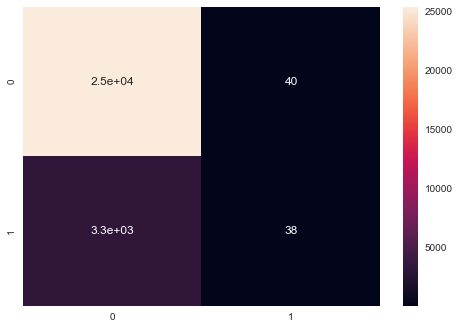

In [81]:
CM=confusion_matrix(y_test,y_pred_rm_cust2)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rm_cust2)
acc= accuracy_score(y_test, y_pred_rm_cust2)
roc=roc_auc_score(y_test, y_pred_rm_cust2)
prec = precision_score(y_test, y_pred_rm_cust2)
rec = recall_score(y_test, y_pred_rm_cust2)
f1 = f1_score(y_test, y_pred_rm_cust2)

mathew = matthews_corrcoef(y_test, y_pred_rm_cust2)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.888801,0.5625,0.039547,0.996113,0.073899,0.51783,3.840683,0.127225


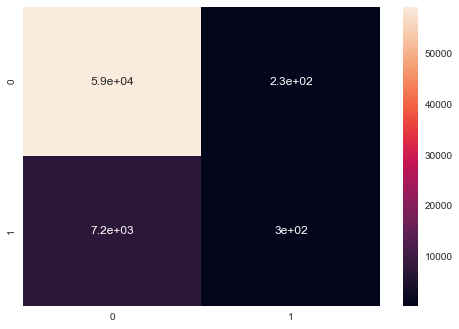

In [82]:
CM=confusion_matrix(y_train,y_pred_train)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_train, y_pred_train)
acc= accuracy_score(y_train, y_pred_train)
roc=roc_auc_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

mathew = matthews_corrcoef(y_train, y_pred_train)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

Removing Customer Score 1

In [83]:
df3.head()

,CustomScore1,CreditCardBalance,InquriesInLast6Months,IncomeAnnual,BadFlag
0,0.318988,14701,1,100000,0
1,0.229145,16300,1,115000,0
2,0.059483,13827,0,83000,0
3,0.068970,15612,2,108000,0
4,0.077304,37588,1,82000,0


In [84]:
# Copy all the predictor variables into X dataframe
X = df3.drop('BadFlag', axis=1)

# Copy target into the y dataframe. 
y = df3['BadFlag']

In [85]:
print(color.BOLD+color.PURPLE+"Splitting Target(X) and Predictor(y) into training and test set in 70:30 ratio :")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

Splitting Target(X) and Predictor(y) into training and test set in 70:30 ratio :


In [86]:
print(color.BOLD+color.PURPLE+'Data is split as independent and dependent variables into training and test set in 70:30 ratio:')
print("\n")
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the independent variables:',X_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the independent variables:',X_test.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Data is split as independent and dependent variables into training and test set in 70:30 ratio:


Number of rows and columns of the training set for the independent variables: (66943, 4)
Number of rows and columns of the training set for the dependent variable: (66943,)
Number of rows and columns of the test set for the independent variables: (28690, 4)
Number of rows and columns of the test set for the dependent variable: (28690,)


<h3> Scaling dataset :Normalizing all the numeric feature in the range of 0 to 1</h3>

In [87]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [88]:
print(color.BOLD+color.PURPLE+'Scaled Train Data Set:')
X_train_norm[0]

Scaled Train Data Set:


array([0.69480411, 0.01840424, 0.02564103, 0.03673371])

In [89]:
print(color.BOLD+color.PURPLE+'Scaled Test Data Set:')
X_test_norm[0]

Scaled Test Data Set:


array([0.02403182, 0.02670701, 0.        , 0.15306036])

<h3> Model Building implmeneted through Stacking</h3>
<br> 1. Building Level 0 models :Building different baseline models with 10-fold cross validation.
<br> 2. Model selection : Selecting list of top performing models to be used in stacked ensemble method.
<br> 3. Model Evaluation.
<br> 4. Comparing individiual and stacked model performance.

<h4> Build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0 of stacked ensemble method:<h4>

In [90]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [91]:
print(color.BOLD+color.CYAN+'Accuracy')
models = GetBasedModel()
names,results = BasedLine2(X_train_norm, y_train,models)

Accuracy
LR_L2: 0.887845 (0.003549)
LDA: 0.879793 (0.003620)
KNN7: 0.879121 (0.003206)
KNN5: 0.874251 (0.003584)
KNN11: 0.883363 (0.003308)
CART: 0.812721 (0.006405)
NB: 0.865288 (0.004128)
AB: 0.887636 (0.003552)
GBM: 0.887516 (0.003628)
RF_Ent100: 0.881257 (0.004177)
RF_Gini100: 0.881437 (0.003878)
ET100: 0.876044 (0.003888)
MLP: 0.887815 (0.003663)
SGD3000: 0.887815 (0.003747)


In [92]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(11),
    KNeighborsClassifier(7),
    ExtraTreesClassifier(n_estimators= 500),
    GaussianNB(),
    MLPClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(penalty='l2'),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

In [93]:
S_train, S_test = stacking(models,                   
                           X_train_norm, y_train, X_test_norm,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [14]

model  0:     [RandomForestClassifier]
    fold  0:  [0.88318769]
    fold  1:  [0.88034954]
    fold  2:  [0.88027485]
    fold  3:  [0.88161040]
    fold  4:  [0.88235733]
    ----
    MEAN:     [0.88155596] + [0.00113176]
    FULL:     [0.88155595]

model  1:     [RandomForestClassifier]
    fold  0:  [0.88191799]
    fold  1:  [0.87922922]
    fold  2:  [0.88139518]
    fold  3:  [0.88175978]
    fold  4:  [0.88250672]
    ----
    MEAN:     [0.88136178] + [0.00112495]
    FULL:     [0.88136176]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.88348644]
    fold  1:  [0.88445739]
    fold  2:  [0.88281425]
    fold  3:  [0.88377652]
    fold  4:  [0.88504631]
    ----
    MEAN:     [0.88391618] + [0.00077311]
    FULL:     [0.88391617]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.87937859]
    fold  1:  [0.88005079]
    fold  2:  [0.878631

In [94]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred_rm_cust1 = model.predict(S_test)
print(color.BOLD+color.PURPLE+'Final Test Accuracy score: [%.8f]' % accuracy_score(y_test, y_pred_rm_cust1))

Final Test Accuracy score: [0.88445451]


In [95]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred_train = model.predict(S_train)
print(color.BOLD+color.PURPLE+'Final Train Accuracy score: [%.8f]' % accuracy_score(y_train, y_pred_train))

Final Train Accuracy score: [0.88806895]


<h4> Model Evaluation</h4>

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.884455,0.40625,0.007872,0.998503,0.015444,0.503187,3.990801,0.043128


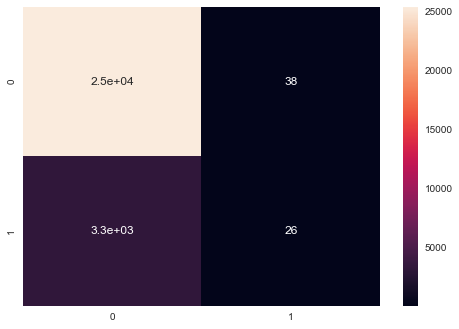

In [96]:
CM=confusion_matrix(y_test,y_pred_rm_cust1)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rm_cust1)
acc= accuracy_score(y_test, y_pred_rm_cust1)
roc=roc_auc_score(y_test, y_pred_rm_cust1)
prec = precision_score(y_test, y_pred_rm_cust1)
rec = recall_score(y_test, y_pred_rm_cust1)
f1 = f1_score(y_test, y_pred_rm_cust1)

mathew = matthews_corrcoef(y_test, y_pred_rm_cust1)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.888069,0.660377,0.00466,0.999697,0.009256,0.502179,3.865962,0.048895


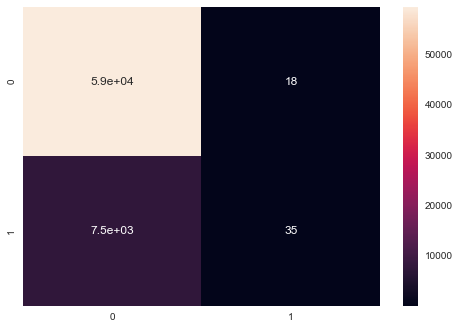

In [97]:
CM=confusion_matrix(y_train,y_pred_train)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_train, y_pred_train)
acc= accuracy_score(y_train, y_pred_train)
roc=roc_auc_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

mathew = matthews_corrcoef(y_train, y_pred_train)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [98]:
data = {'Removing F1 score': y_pred_rm_f1, 'Removing Customer2': y_pred_rm_cust2,       
                'Removing Customer1': y_pred_rm_cust1,       
                 }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.888069,0.660377,0.004660,0.999697,0.009256,0.502179,3.865962,0.048895
1,Removing F1 score,0.884594,0.452381,0.011505,0.998188,0.022439,0.504846,3.985986,0.057258
2,Removing Customer2,0.884803,0.487179,0.011505,0.998424,0.022479,0.504965,3.978762,0.060862
3,Removing Customer1,0.884455,0.406250,0.007872,0.998503,0.015444,0.503187,3.990801,0.043128


<h2> DataSet is validated by removing features and results are as above. <br>
<h2> Conclusion : As per the results, removal of CustomScore1 has reduced model's precision, sensitivty and thus we can say that, CustomScore1 is the best among (CustomScore1,CustomScore2, and F1 score) to classify 0's and 1's in badflag.

<h1> To check if CreditCardBalance and InquiriesInLast6Months predictive of risk in addition to the
best score CustomScore1, below validations are done :</h1>

In [101]:
df4=pd.DataFrame(df1)
df4.head()

,CustomScore1,CustomScore2,CreditCardBalance,InquriesInLast6Months,IncomeAnnual,BadFlag
0,0.318988,0.290841,14701,1,100000,0
1,0.229145,0.230242,16300,1,115000,0
2,0.059483,0.037298,13827,0,83000,0
3,0.068970,0.063600,15612,2,108000,0
4,0.077304,0.085119,37588,1,82000,0


In [102]:
df4.drop(columns=['CustomScore2','CreditCardBalance','InquriesInLast6Months'],axis=1,inplace=True)

In [103]:
df4.head()

,CustomScore1,IncomeAnnual,BadFlag
0,0.318988,100000,0
1,0.229145,115000,0
2,0.059483,83000,0
3,0.068970,108000,0
4,0.077304,82000,0


In [104]:
# Copy all the predictor variables into X dataframe
X = df4.drop('BadFlag', axis=1)

# Copy target into the y dataframe. 
y = df4['BadFlag']

In [105]:
print(color.BOLD+color.PURPLE+"Splitting Target(X) and Predictor(y) into training and test set in 70:30 ratio :")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

Splitting Target(X) and Predictor(y) into training and test set in 70:30 ratio :


In [106]:
print(color.BOLD+color.PURPLE+'Data is split as independent and dependent variables into training and test set in 70:30 ratio:')
print("\n")
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the independent variables:',X_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the independent variables:',X_test.shape)
print(color.BOLD+color.PURPLE+'Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Data is split as independent and dependent variables into training and test set in 70:30 ratio:


Number of rows and columns of the training set for the independent variables: (66943, 2)
Number of rows and columns of the training set for the dependent variable: (66943,)
Number of rows and columns of the test set for the independent variables: (28690, 2)
Number of rows and columns of the test set for the dependent variable: (28690,)


<h3> Scaling dataset :Normalizing all the numeric feature in the range of 0 to 1</h3>

In [107]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [108]:
print(color.BOLD+color.PURPLE+'Scaled Train Data Set:')
X_train_norm[0]

Scaled Train Data Set:


array([0.69480411, 0.03673371])

In [109]:
print(color.BOLD+color.PURPLE+'Scaled Test Data Set:')
X_test_norm[0]

Scaled Test Data Set:


array([0.02403182, 0.15306036])

<h3> Model Building implmeneted through Stacking</h3>
<br> 1. Building Level 0 models :Building different baseline models with 10-fold cross validation.
<br> 2. Model selection : Selecting list of top performing models to be used in stacked ensemble method.
<br> 3. Model Evaluation.
<br> 4. Comparing individiual and stacked model performance.

<h4> Build different baseline models and perform 10-fold cross validation to filter top performing baseline models to be used in level 0 of stacked ensemble method:<h4>

In [110]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [111]:
print(color.BOLD+color.CYAN+'Accuracy')
models = GetBasedModel()
names,results = BasedLine2(X_train_norm, y_train,models)

Accuracy
LR_L2: 0.887815 (0.003747)
LDA: 0.875566 (0.003588)
KNN7: 0.878494 (0.004534)
KNN5: 0.872235 (0.005064)
KNN11: 0.882273 (0.004317)
CART: 0.817845 (0.003895)
NB: 0.872339 (0.003765)
AB: 0.887681 (0.003774)
GBM: 0.887457 (0.003842)
RF_Ent100: 0.852576 (0.003146)
RF_Gini100: 0.852785 (0.002893)
ET100: 0.846631 (0.003448)
MLP: 0.887815 (0.003747)
SGD3000: 0.887815 (0.003747)


In [112]:
import xgboost as xgboost
# selecting list of top performing models to be used in stacked ensemble method
models = [
    RandomForestClassifier(criterion='entropy',n_estimators=100),
    RandomForestClassifier(criterion='gini',n_estimators=100),
    KNeighborsClassifier(11),
    KNeighborsClassifier(7),
    ExtraTreesClassifier(n_estimators= 500),
    GaussianNB(),
    MLPClassifier(),
    SGDClassifier(max_iter=1000, tol=1e-4),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(penalty='l2'),
    GradientBoostingClassifier(n_estimators=100,max_features='sqrt'),
    ExtraTreesClassifier(n_estimators= 1000),
]

In [113]:
S_train, S_test = stacking(models,                   
                           X_train_norm, y_train, X_test_norm,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [14]

model  0:     [RandomForestClassifier]
    fold  0:  [0.85338711]
    fold  1:  [0.84995145]
    fold  2:  [0.85092240]
    fold  3:  [0.85457126]
    fold  4:  [0.85091126]
    ----
    MEAN:     [0.85194870] + [0.00173582]
    FULL:     [0.85194867]

model  1:     [RandomForestClassifier]
    fold  0:  [0.85428337]
    fold  1:  [0.85099709]
    fold  2:  [0.85084771]
    fold  3:  [0.85599044]
    fold  4:  [0.85277861]
    ----
    MEAN:     [0.85297944] + [0.00196370]
    FULL:     [0.85297940]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.88199268]
    fold  1:  [0.87997610]
    fold  2:  [0.88034954]
    fold  3:  [0.88452345]
    fold  4:  [0.88288019]
    ----
    MEAN:     [0.88194439] + [0.00167017]
    FULL:     [0.88194434]

model  3:     [KNeighborsClassifier]
    fold  0:  [0.87863171]
    fold  1:  [0.87459855]
    fold  2:  [0.877212

In [114]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred_rm_cust1_2 = model.predict(S_test)
print(color.BOLD+color.PURPLE+'Final Test Accuracy score: [%.8f]' % accuracy_score(y_test, y_pred_rm_cust1_2))

Final Test Accuracy score: [0.88487278]


In [115]:
# initializing generalizer model i.e., MLP classifier in our case
model = MLPClassifier()
    
model = model.fit(S_train, y_train)
y_pred_train = model.predict(S_train)
print(color.BOLD+color.PURPLE+'Final Train Accuracy score: [%.8f]' % accuracy_score(y_train, y_pred_train))

Final Train Accuracy score: [0.88781501]


<h4> Model Evaluation</h4>

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.884873,0.0,0.0,1.0,0.0,0.5,3.976353,0.0


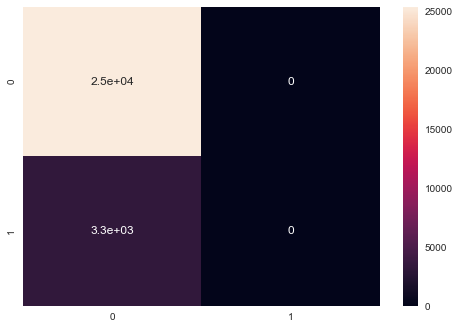

In [116]:
CM=confusion_matrix(y_test,y_pred_rm_cust1_2)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rm_cust1_2)
acc= accuracy_score(y_test, y_pred_rm_cust1_2)
roc=roc_auc_score(y_test, y_pred_rm_cust1_2)
prec = precision_score(y_test, y_pred_rm_cust1_2)
rec = recall_score(y_test, y_pred_rm_cust1_2)
f1 = f1_score(y_test, y_pred_rm_cust1_2)

mathew = matthews_corrcoef(y_test, y_pred_rm_cust1_2)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,STacked Classifier,0.887815,0.0,0.0,1.0,0.0,0.5,3.874732,0.0


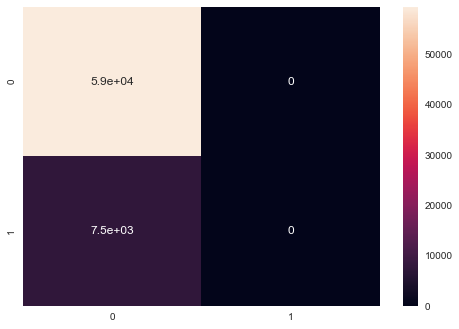

In [117]:
CM=confusion_matrix(y_train,y_pred_train)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_train, y_pred_train)
acc= accuracy_score(y_train, y_pred_train)
roc=roc_auc_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

mathew = matthews_corrcoef(y_train, y_pred_train)
model_results =pd.DataFrame([['STacked Classifier',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

<h2> Conclusion : As per results obtained, we can see that absence of CreditCardBalance and InquiriesInLast6Months has severly impacted
    model's precision, sensitivity , hence we can conclude that these 2 features are important along with Score1</h1>